In [1]:
#1928152 Animesh Pathak Assignment 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

plt.rcParams['figure.figsize'] = (12.0, 9.0)
df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\twentyscience.csv')
#Kaggle Dataset https://www.kaggle.com/federicoseijo/twenty-one-pilots-discography/version/1
print(df1)

     Unnamed: 0  album_release_year  danceability  energy  key  loudness  \
0             1                2021         0.684   0.677    7    -7.355   
1             2                2021         0.700   0.664    7    -8.211   
2             3                2021         0.588   0.856    9    -5.242   
3             4                2021         0.785   0.623   11    -6.923   
4             5                2021         0.687   0.890    8    -5.990   
..          ...                 ...           ...     ...  ...       ...   
125         126                2009         0.550   0.625    1    -8.213   
126         127                2009         0.618   0.732    5    -4.609   
127         128                2009         0.567   0.572    9    -7.694   
128         129                2009         0.363   0.135    7   -11.166   
129         130                2009         0.753   0.421    7    -6.988   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0       1 

In [2]:
df1.isnull().sum()
df1.shape

(130, 19)

In [3]:
X = df1.drop("album_release_year",axis=1)
Y = df1["album_release_year"] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
Y_pred

array([2021, 2013, 2013, 2013, 2013, 2015, 2013, 2015, 2013, 2015, 2013,
       2021, 2018, 2013, 2021, 2013, 2009, 2013, 2021, 2013, 2013, 2013,
       2018, 2013, 2013, 2013], dtype=int64)

In [4]:
accuracy=metrics.accuracy_score(Y_test,Y_pred)
accuracy

1.0

In [5]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 1  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

        2009       1.00      1.00      1.00         1
        2013       1.00      1.00      1.00        16
        2015       1.00      1.00      1.00         3
        2018       1.00      1.00      1.00         2
        2021       1.00      1.00      1.00         4

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [6]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


[Text(372.0, 428.08500000000004, 'X[0] <= 39.5\ngini = 0.611\nsamples = 104\nvalue = [13, 61, 11, 12, 7]'),
 Text(223.20000000000002, 305.775, 'X[0] <= 25.0\ngini = 0.651\nsamples = 30\nvalue = [0, 0, 11, 12, 7]'),
 Text(148.8, 183.46500000000003, 'X[0] <= 11.0\ngini = 0.465\nsamples = 19\nvalue = [0, 0, 0, 12, 7]'),
 Text(74.4, 61.15499999999997, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 7]'),
 Text(223.20000000000002, 61.15499999999997, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(297.6, 183.46500000000003, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(520.8000000000001, 305.775, 'X[0] <= 116.5\ngini = 0.29\nsamples = 74\nvalue = [13, 61, 0, 0, 0]'),
 Text(446.40000000000003, 183.46500000000003, 'gini = 0.0\nsamples = 61\nvalue = [0, 61, 0, 0, 0]'),
 Text(595.2, 183.46500000000003, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0]')]

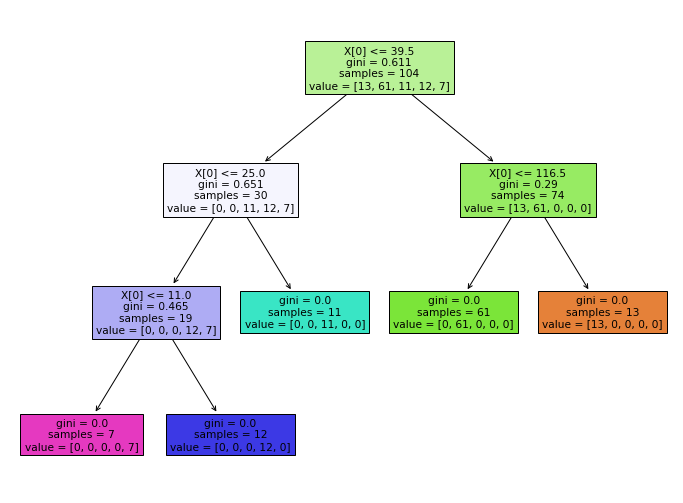

In [7]:
tree.plot_tree(model,filled = True)